![](https://images.aicrowd.com/raw_images/challenges/banner_file/1021/e6d6bda6dc16f4905124.png)

<h2><center>Starter Code for Face Recognition</center></h2>


In this baseline we will be using basic [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
 to compare the missing person image to all target faces ans generate our predictions. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [1]:
!pip install aicrowd-cli

# Make sure to re-run below code whenever you restart colab notebook

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Creating a new data directory and downloading the dataset 
!rm -rf data
!mkdir data
%aicrowd ds dl -c face-recognition -o data

%%bash
cd data
unzip data.zip

In [2]:
!ls data/

data.zip  missing  sample_submission.csv  target


# unzipping the data

!unzip data/data.zip -d data > /dev/null

## Importing Libraries

In [3]:
import pandas as pd
import os
import numpy as np
import random
from tqdm.notebook import tqdm
import cv2

random.seed(42)

## Reading Dataset

In [4]:
# Getting all image ids from a folder

image_ids = os.listdir("data/missing")
len(image_ids)

1000

In [5]:
!ls data/

data.zip  missing  sample_submission.csv  target


In [6]:
import matplotlib.pyplot as plt

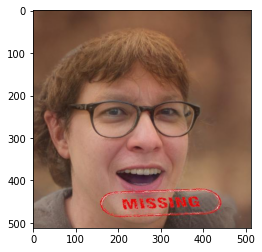

In [7]:
# Reading a sample missing person image


sample_image_id = random.choice(image_ids)
sample_missing = cv2.imread(os.path.join("data/missing", sample_image_id))[:,:,[2,1,0]]
plt.imshow(sample_missing)

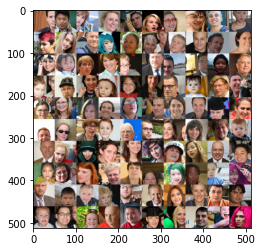

In [8]:
# Reading the corrosponding target faces

sample_target = cv2.imread(os.path.join("data/target", sample_image_id)) [:,:,[2,1,0]]
plt.imshow(cv2.resize(sample_target, (512, 512)))

In [9]:
# We can also split all the faces in the target image to convert them into individual faces images

sample_target_faces = []


def get_target_face(face_no, target_image):


  # Top-Left x, y corrdinates of the specific face 
  x, y = (int(face_no[0]))*216, (int(face_no[1]))*216

  target_face = target_image[x:x+216, y:y+216]

  return target_face

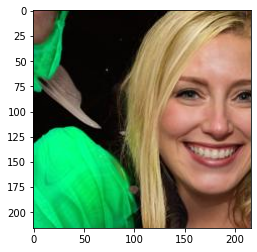

In [10]:
# Showing a sample face from a sample target image 

sample_target_face = get_target_face("96", sample_target)
plt.imshow(sample_target_face)

## Generating Predictions

In [11]:
from PIL import Image

In [12]:
type(Image.fromarray(sample_target_face))

PIL.Image.Image

In [13]:
from mlutil.feature_extraction import images as image_feature_extraction

In [14]:
from torchvision import models
import torch

In [15]:
from facenet_pytorch import MTCNN, InceptionResnetV1


resnet = InceptionResnetV1(pretrained='vggface2').eval()
resnet_children = list(resnet.children())

In [16]:
#resnet

In [17]:
from torch import nn

In [18]:
len(resnet_children)

18

In [19]:
resnet_submodule = nn.Sequential(*resnet_children[:15])

In [20]:
resnet_submodule

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (1): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (2): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (5): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3,

In [21]:
image_vectorizer = image_feature_extraction.TorchFeatureExtractor(resnet_submodule, appended_modules=[nn.Flatten()], last_layer_index=None, use_gpu=True, to_fp16=True, last_nested_layer_index=None)

/home/kuba/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [22]:
img_id = image_ids[0]
missing_image = cv2.imread(os.path.join("data/missing", img_id))[:,:,[2,1,0]]

In [23]:
image_vectorizer.model(image_vectorizer.process_img(missing_image)).shape

torch.Size([1, 1792])

In [24]:
from torchvision import transforms
from PIL import Image

In [25]:
from torchvision import datasets

In [26]:
from torch.utils import data

In [27]:
img_id = image_ids[0]
target_image = cv2.imread(os.path.join("data/target", img_id))[:,:,[2,1,0]]

In [28]:
def get_imgs(target_image, preprocess=True):
    imgs = [
        target_image[i*216:(i+1)*216, 
        j*216:(j+1)*216]
        for i in range(10)
        for j in range(10)
    ]
    if preprocess:
        return torch.vstack([image_vectorizer.process_img(img) for img in imgs])
    else:
        return imgs

In [29]:
imgs = get_imgs(target_image)

In [30]:
imgs.shape

torch.Size([100, 3, 224, 224])

In [31]:
from sklearn import metrics

In [32]:
used_model = image_vectorizer.model#image_vectorizer.model

In [33]:
import skimage.io

In [34]:
from skimage import util

In [35]:
target_image = skimage.io.imread(os.path.join("data/target", image_ids[0]))

In [44]:
torch.load("Mobilenet_se_focal_121000.pt")

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-44-0d9ffc09bca4>:1 in <module>                                             │
│ /home/kuba/.local/lib/python3.8/site-packages/torch/serialization.py:593 in load          │
│                                                                                           │
│   590 │   │   │   │   │   opened_file.seek(orig_position)                                 │
│   591 │   │   │   │   │   return torch.jit.load(opened_file)                              │
│   592 │   │   │   │   return _load(opened_zipfile, map_location, pickle_module, **pickle_ │
│ ❱ 593 │   │   return _legacy_load(opened_file, map_location, pickle_module, **pickle_load │
│   594                                                                                     │
│   595                                                                                     │
│   596 # Register pickling support for layout instances such as                            │
│                                                                                           │
│ /home/kuba/.local/lib/python3.8/site-packages/torch/serialization.py:779 in _legacy_load  │
│                                                                                           │
│   776 │   offset = f.tell() if f_should_read_directly else None                           │
│   777 │   for key in deserialized_storage_keys:                                           │
│   778 │   │   assert key in deserialized_objects                                          │
│ ❱ 779 │   │   deserialized_objects[key]._set_from_file(f, offset, f_should_read_directly) │
│   780 │   │   if offset is not None:                                                      │
│   781 │   │   │   offset = f.tell()                                                       │
│   782                                                                                     │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: unexpected EOF, expected 26116 more bytes. The file might be corrupted.

In [36]:
predictions = {"ImageID":[], "target":[]}


for img_id in tqdm(image_ids):

    missing_image = skimage.io.imread(os.path.join("data/missing", img_id))
    
    missing_image_vector = used_model(image_vectorizer.process_img(missing_image)).cpu().numpy()

    target_image = skimage.io.imread(os.path.join("data/target", img_id))
    target_images_path = os.path.splitext(os.path.join("data/target", img_id))[0]
    imgs = util.view_as_blocks(target_image, (216, 216, 3)).reshape(100, 216, 216, 3)
    !mkdir -p $target_images_path
    for i, img in enumerate(imgs):
        skimage.io.imsave(os.path.join(target_images_path, str(i) + '.jpg'), img)##np.array(img).transpose([1,2,0]))
        
    #target_vectors = used_model(torch_imgs).cpu().numpy()
    # Face no with minimum MSE
    #imgs = get_imgs(target_image)
    
    #similarities = metrics.pairwise.pairwise_distances(missing_image_vector, target_vectors)
    #closest_face_no = similarities[0].argmin()
    
    #predictions['ImageID'].append(img_id.replace(".jpg", ""))
    #predictions['target'].append(closest_face_no)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
import deepface

In [40]:
import tensorflow

In [45]:
from tensorflow import keras

In [48]:
tensorflow.__version__

'2.8.0'

In [49]:
import deepface.commons.functions

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-49-5b656496f39f>:1 in <module>                                             │
│ /home/kuba/.local/lib/python3.8/site-packages/deepface/commons/functions.py:24 in         │
│ <module>                                                                                  │
│                                                                                           │
│    21 │   from keras.preprocessing import image                                           │
│    22 elif tf_major_version == 2:                                                         │
│    23 │   from tensorflow import keras                                                    │
│ ❱  24 │   from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_arr │
│    25 │   from tensorflow.keras.applications.imagenet_utils import preprocess_input       │
│    26 │   from tensorflow.keras.preprocessing import image                                │
│    27                                                                                     │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
??deepface.commons.functions

In [42]:
from deepface import DeepFace


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-42-9992a767273a>:1 in <module>                                             │
│ /home/kuba/.local/lib/python3.8/site-packages/deepface/DeepFace.py:15 in <module>         │
│                                                                                           │
│    12 from tqdm import tqdm                                                               │
│    13 import pickle                                                                       │
│    14                                                                                     │
│ ❱  15 from deepface.basemodels import VGGFace, OpenFace, Facenet, Facenet512, FbDeepFace, │
│    16 from deepface.extendedmodels import Age, Gender, Race, Emotion                      │
│    17 from deepface.commons import functions, realtime, distance as dst                   │
│    18                                                                                     │
│                                                                                           │
│ /home/kuba/.local/lib/python3.8/site-packages/deepface/basemodels/VGGFace.py:5 in         │
│ <module>                                                                                  │
│                                                                                           │
│    2 from pathlib import Path                                                             │
│    3 import gdown                                                                         │
│    4                                                                                      │
│ ❱  5 from deepface.commons import functions                                               │
│    6                                                                                      │
│    7 import tensorflow as tf                                                              │
│    8 tf_version = int(tf.__version__.split(".")[0])                                       │
│                                                                                           │
│ /home/kuba/.local/lib/python3.8/site-packages/deepface/commons/functions.py:24 in         │
│ <module>                                                                                  │
│                                                                                           │
│    21 │   from keras.preprocessing import image                                           │
│    22 elif tf_major_version == 2:                                                         │
│    23 │   from tensorflow import keras                                                    │
│ ❱  24 │   from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_arr │
│    25 │   from tensorflow.keras.applications.imagenet_utils import preprocess_input       │
│    26 │   from tensorflow.keras.preprocessing import image                                │
│    27                                                                                     │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'tensorflow.keras'

In [39]:
!pip freeze | grep tensorflow

tensorflow==2.8.0
tensorflow-estimator==2.3.0
tensorflow-gpu==2.4.1
tensorflow-hub==0.11.0
tensorflow-io-gcs-filesystem==0.24.0


In [63]:
submission = pd.DataFrame(predictions)
submission

,ImageID,target
0,qkug9,5
1,0od55,14
2,3d874,29
3,teonh,57
4,hhne6,73
...,...,...
995,cul3y,49
996,zu530,49
997,owel7,9
998,1ztys,7


In [64]:
submission

,ImageID,target
0,qkug9,5
1,0od55,14
2,3d874,29
3,teonh,57
4,hhne6,73
...,...,...
995,cul3y,49
996,zu530,49
997,owel7,9
998,1ztys,7


### Saving the Predictions

In [3]:
# Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  


%load_ext aicrowd.magic
%aicrowd login

Please login here: https://api.aicrowd.com/auth/UHiVIXTSzmy2wwPWZARDbews9eu7Q2C5qNL3wgfNHRw
API Key valid
Saved API Key successfully!


In [4]:
!ls

Mobilenet_se_focal_121000.pt
assets
baseline-face-recognition-dc9e45f8-3e3f-4040-886b-b6482fa98245.ipynb
data
submission
target_images_path


In [5]:
# Saving the predictions
!rm -rf submission/assets
!mkdir -p submission/assets
submission.to_csv(os.path.join("submission", "assets", "submission.csv"), index=False)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-5-df7ad4f91bfe>:4 in <module>                                              │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'submission' is not defined

In [67]:
%%bash
pushd submission
rm submission.zip
cp ../Baseline_Sentiment_Classification.ipynb notebook.ipynb
zip -r submission.zip *
popd

~/Projects/aicrowd/blitzxiii/face_recognition/submission ~/Projects/aicrowd/blitzxiii/face_recognition
  adding: assets/ (stored 0%)
  adding: assets/submission.csv (deflated 38%)
  adding: notebook.ipynb (deflated 34%)
~/Projects/aicrowd/blitzxiii/face_recognition


cp: cannot stat '../Baseline_Sentiment_Classification.ipynb': No such file or directory


In [6]:
!aicrowd submission create -c face-recognition -f submission/submission.zip

submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 289.1/287.5 KB • 2.1 MB/s • 0:00:00 • 0:00:010:00:01
                                                   ╭─────────────────────────╮                                                   
                                                   │ Successfully submitted! │                                                   
                                                   ╰─────────────────────────╯                                                   
                                                         Important links                                                         
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/submissions/173298              │
│                  │                                                                                                      

## Submitting our Predictions

In [ ]:
%aicrowd notebook submit -c face-recognition -a assets --no-verify

Congratulations to making your first submission in the puzzle 🎉  . Let's continue with the journey by improving the baseline & making submission! Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in discussion forum or in AIcrowd Discord sever, AIcrew will be happy to help you :)

Have a cool new idea that you want to see in the next blitz ? Let us know!